In [ ]:
import NLFEM
import numpy as np
import matplotlib.pyplot as plt
from NLFEM.Mesh import Rect
import os

PATH = os.getcwd()
nombre = "\\NLFEM\\Mesh\\input.txt"
GEOMETRIA = Rect.Rect(PATH+nombre,10,10)

GEOMETRIA.dibujarse()

def generarCBdesdeBordeX(this, borde, valor=0):
    cb = []
    nodos = this.darNodosCB(borde)
    cbe = np.zeros([len(nodos), 2])
    cbe[:, 0] = nodos*2
    cbe[:, 1] = valor
    cb += cbe.tolist()
    return cb

def generarCBdesdeBordeY(this, borde, valor=0):
    cb = []
    nodos = this.darNodosCB(borde)
    cbe = np.zeros([len(nodos), 2])
    cbe[:, 0] = nodos*2+1
    cbe[:, 1] = valor
    cb += cbe.tolist()
    return cb

def generarCBdesdeBorde(this, borde, valor=[0,0]):
    return generarCBdesdeBordeX(this, borde, valor[0])+generarCBdesdeBordeY(this, borde, valor[1])

a = 5
E = 2.1*10**6
V = 0.2
u = 0.001
e
#Objeto_FEM = NLFEM.NoLocal(GEOMETRIA)
GEOMETRIA.cbe = generarCBdesdeBorde(GEOMETRIA,3,[0,0])+generarCBdesdeBordeX(GEOMETRIA,1,u)
Objeto_FEM.definirCondicionesDeBorde(GEOMETRIA.cbe)
z1=0.5
Objeto_FEM.z1 = z1
#Objeto_FEM.solucionar(E=E,v=V,Fx=lambda x,y: 0,Fy=lambda x,y: 0,plot=True)
#Objeto_FEM.defUnitariaX()

In [2]:
for i in range(len(Objeto_FEM.elementos)):
    np.savetxt('MatricesElementos/Ke_'+format(i)+'.csv', Objeto_FEM.elementos[i].Ke, fmt='%.18e', delimiter=',')    
    for j in range(len(Objeto_FEM.elementos[i].KNLS)):
        np.savetxt('MatricesNoLocales/K_'+format(i)+'_'+format(j)+'.csv', Objeto_FEM.elementos[i].KNLS[j], fmt='%.18e', delimiter=',')

In [43]:
np.savetxt('K_1.csv', Objeto_FEM.K, fmt='%.18e', delimiter=',')    

Graficando Solucion [##################################################] 900/900


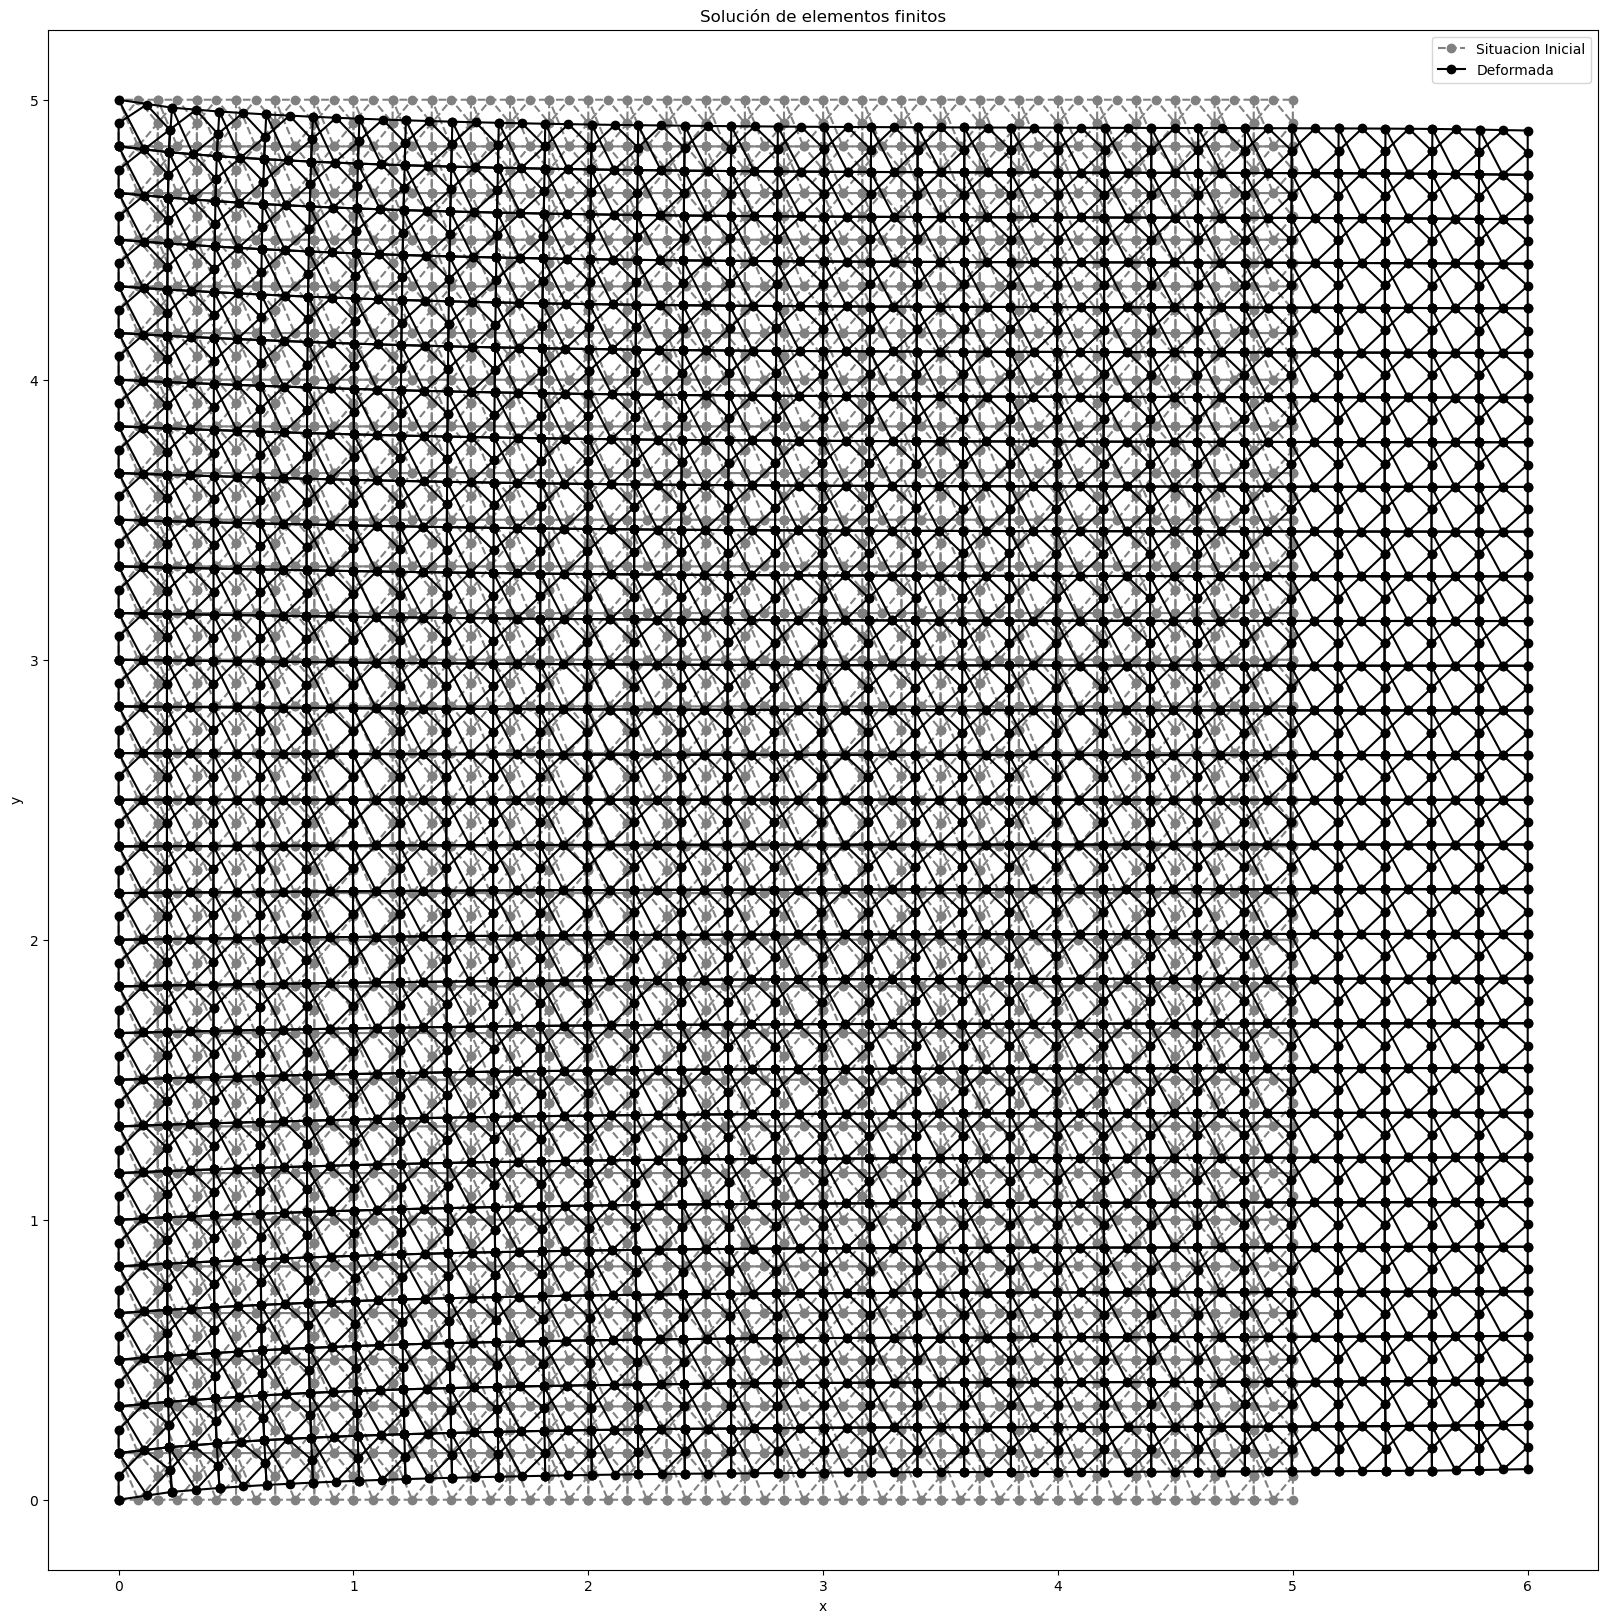

In [50]:
Objeto_FEM.geometria.segmentos = [[0,60],[60,2820],[2820,2760],[2760,0]]
Objeto_FEM.geometria.cbe = []
Objeto_FEM.geometria.cbe=generarCBdesdeBorde(Objeto_FEM.geometria,3,[0,0])+generarCBdesdeBordeX(Objeto_FEM.geometria,1,u)
Objeto_FEM.K = np.zeros([Objeto_FEM.n,Objeto_FEM.n])
Objeto_FEM.F = np.zeros([Objeto_FEM.n,1])
Objeto_FEM.Q = np.zeros([Objeto_FEM.n,1])
Objeto_FEM.U = np.zeros([Objeto_FEM.n,1])
Objeto_FEM.S = np.zeros([Objeto_FEM.n,1])
Objeto_FEM.definirCondicionesDeBorde(Objeto_FEM.geometria.cbe)
Objeto_FEM.ensamblar()
Objeto_FEM.condicionesFrontera(Objeto_FEM.cbe,Objeto_FEM.cbn)
Objeto_FEM.solucionarSistemaEcuaciones()
Objeto_FEM.graficarSolucion(figsize=[20,20],mult=1000)

In [70]:
def postProcesoX(this, U):
    this.Ue = U[np.ix_(this.gdl)]
    this._Ue = this.Ue.T[0].tolist()
    this._Ue.append(this.Ue[0][0])
    Z = this._dominioNaturalZ
    N = this._dominioNaturalN
    x = []
    y = []
    u = []
    this.U = lambda z, n: grad(this, z, n)[0]
    for z, n in zip(Z, N):
        x.append(this.Tx(z, n)[0])
        y.append(this.Ty(z, n)[0])
        u.append(this.U(z, n)[0])
    return x, y, u
def postProcesoY(this, U):
    this.Ue = U[np.ix_(this.gdl)]
    this._Ue = this.Ue.T[0].tolist()
    this._Ue.append(this.Ue[0][0])
    Z = this._dominioNaturalZ
    N = this._dominioNaturalN
    x = []
    y = []
    u = []
    this.U = lambda z, n: grad(this, z, n)[1]
    for z, n in zip(Z, N):
        x.append(this.Tx(z, n)[0])
        y.append(this.Ty(z, n)[0])
        u.append(this.U(z, n)[0])
    return x, y, u

def grad(this, z, n):
    dz = this.dzpsis(z, n)
    dn = this.dnpsis(z, n)
    result = []
    for i in range(len(dz)):
        result.append(this._J(z, n) @ np.array([[dz[i][0]], [dn[i][0]]]))
    result = np.array(result)
    n = len(result)
    U = np.linspace(0,n-1,n).astype(int)
    V = U*2+1
    dx = (this.Ue[np.ix_(U)].T @ result[:, 0])[0]
    dy = (this.Ue[np.ix_(V)].T @ result[:, 1])[0]
    return np.array([dx, dy])
def defUnitariaX(this,figsize):
    count=0
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(projection='3d')
    markersize = 2
    cmap = 'magma'
    linewidth = 2
    xtotal = []
    ytotal = []
    ztotal = []
    count = 0
    for e in this.elementos:
        count+=1
        x,y,u = postProcesoX(e,this.U)
        xtotal.extend(x)
        ytotal.extend(y)
        ztotal.extend(u)
    surf = ax.plot_trisurf(xtotal, ytotal, ztotal,cmap=cmap,zorder=1)
    cbar = fig.colorbar(surf)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel(r'$\varepsilon x$')
    ax.set_title(r'$\frac{\partial U}{\partial X}$')
    return xtotal,ytotal,ztotal
def defUnitariaY(this,figsize):
    count=0
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(projection='3d')
    markersize = 2
    cmap = 'magma'
    linewidth = 2
    xtotal = []
    ytotal = []
    ztotal = []
    count = 0
    for e in this.elementos:
        count+=1
        x,y,u = postProcesoY(e,this.U)
        xtotal.extend(x)
        ytotal.extend(y)
        ztotal.extend(u)
    surf = ax.plot_trisurf(xtotal, ytotal, ztotal,cmap=cmap,zorder=1)
    cbar = fig.colorbar(surf)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel(r'$\varepsilon x$')
    ax.set_title(r'$\frac{\partial U}{\partial Y}$')

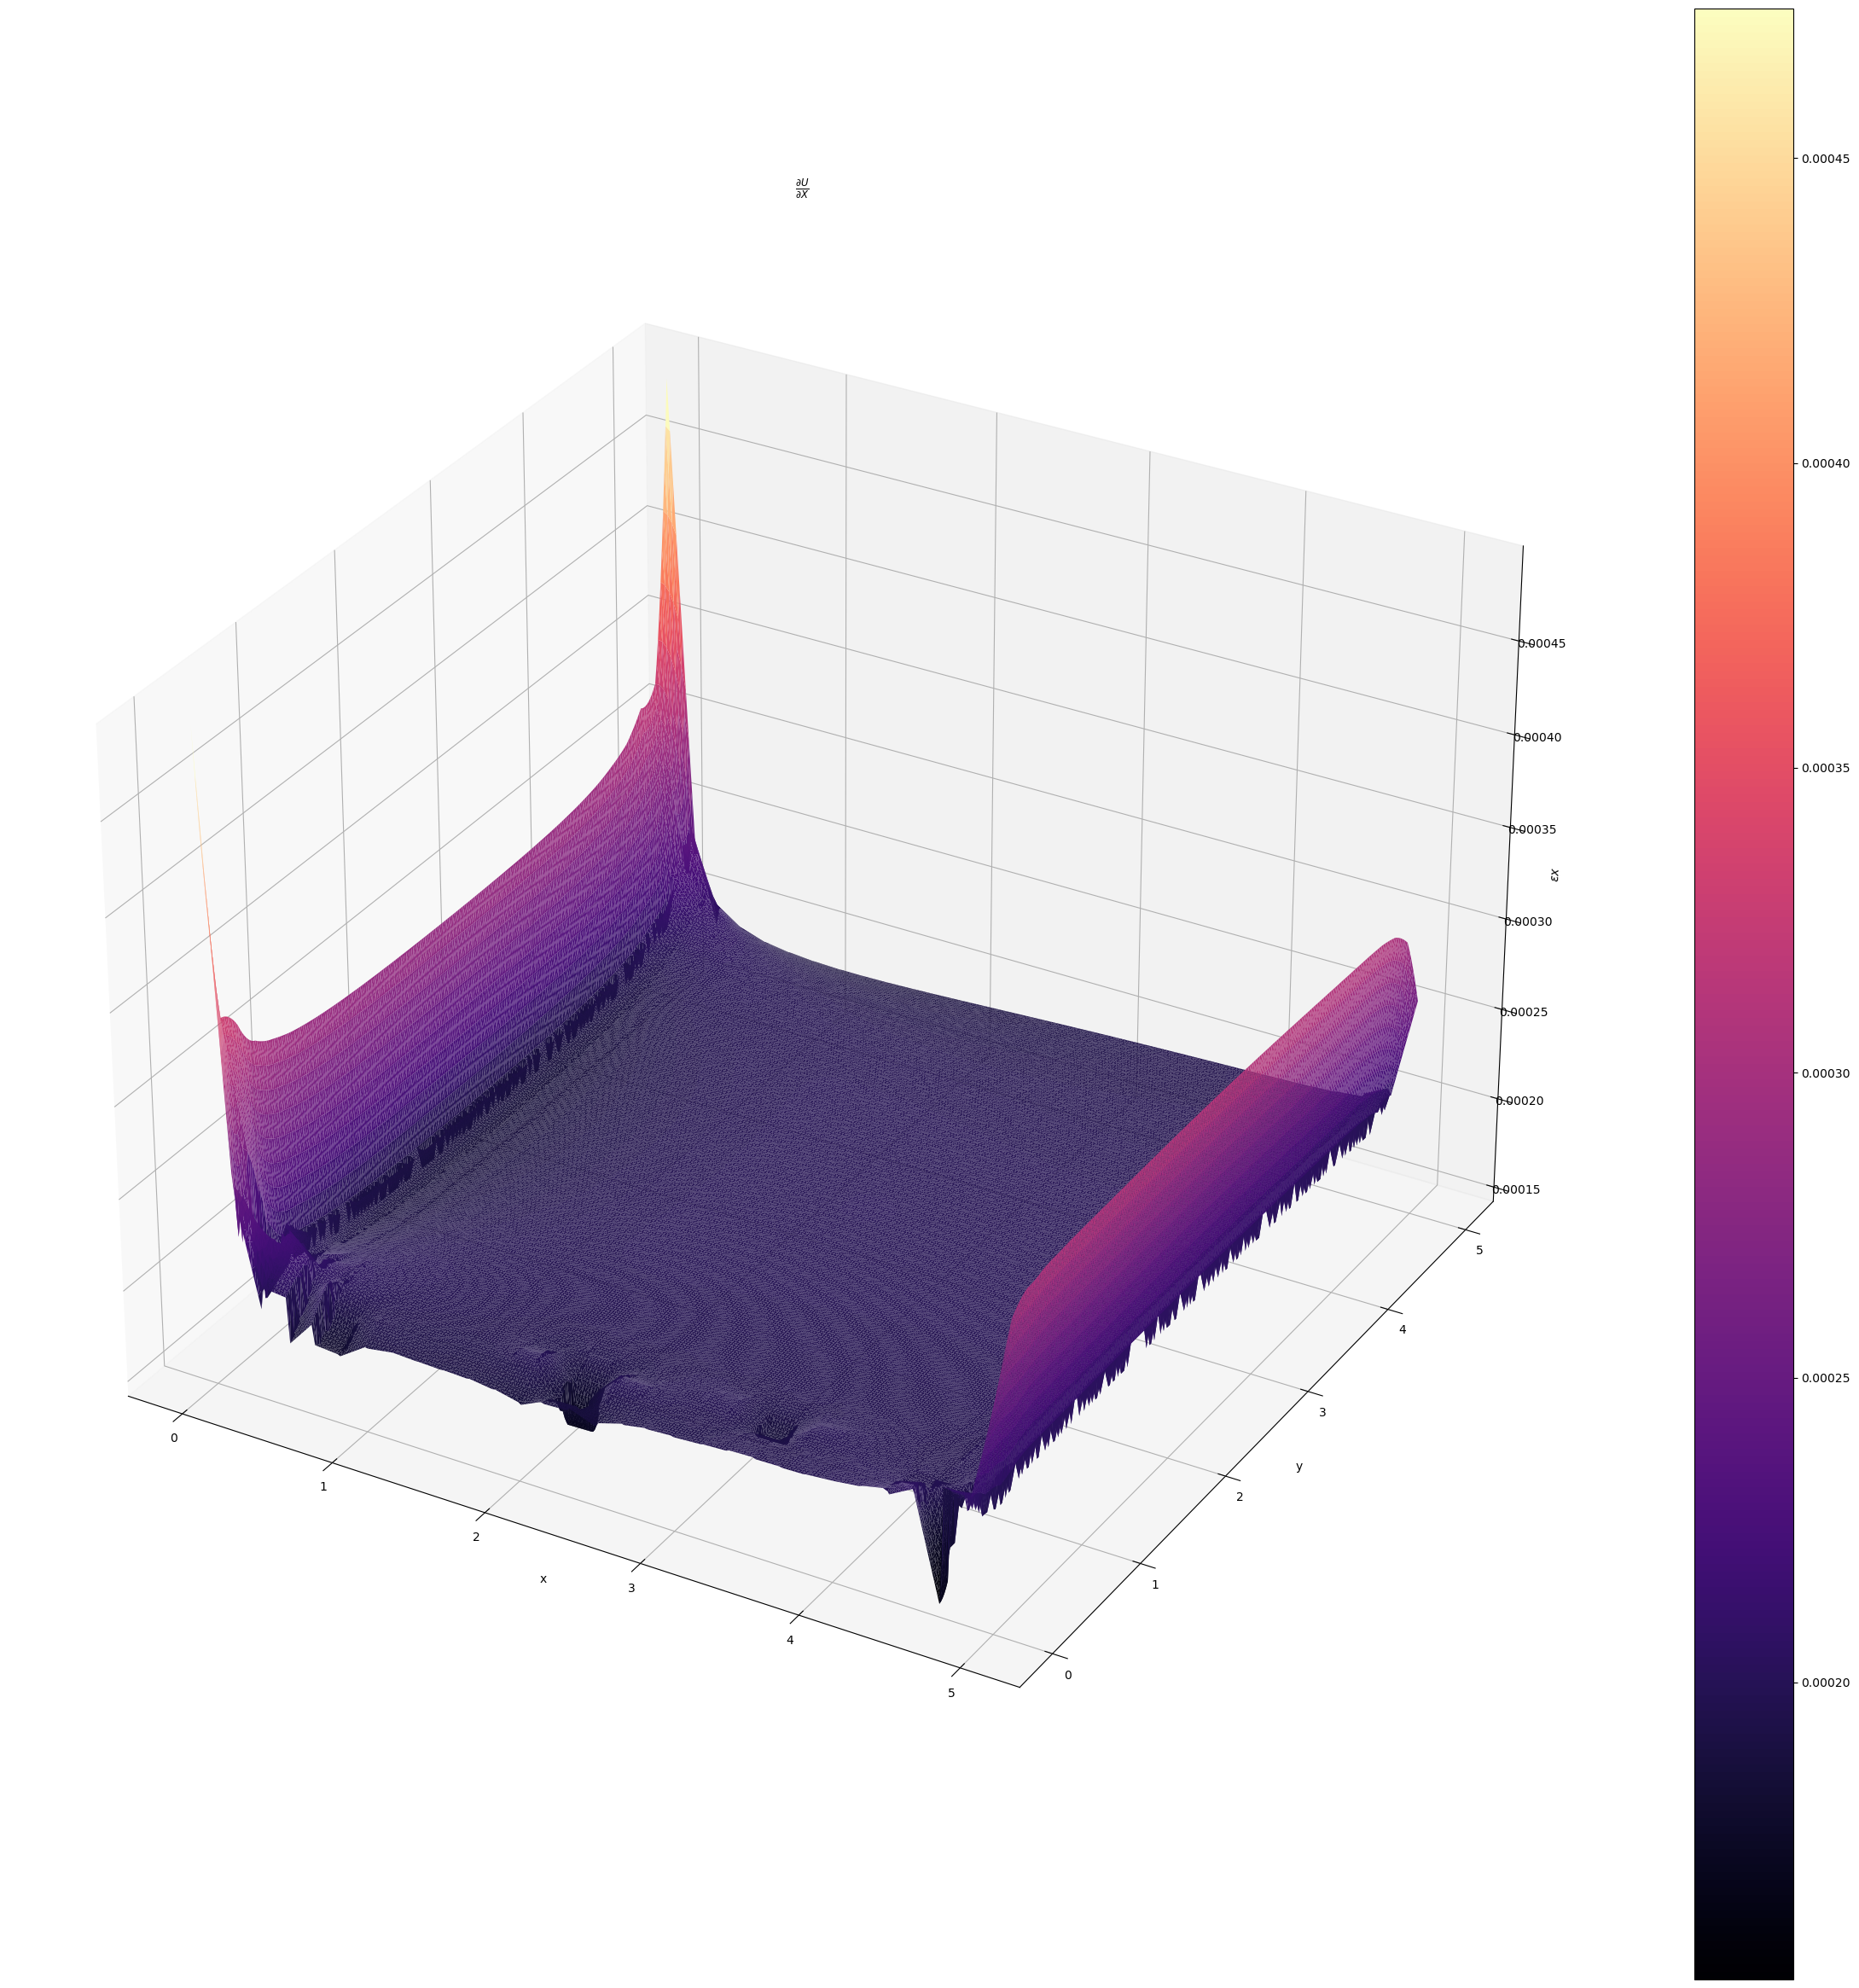

In [71]:
[_X, _Y, _Z] = defUnitariaX(Objeto_FEM,[30,30])

In [75]:
funcion = interpolate.interp2d(_X, _Y, _Z, kind='cubic')

c:\program files\python37\lib\site-packages\scipy\interpolate\_fitpack_impl.py:976: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=41,87 m=90000 fp=730.056843 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


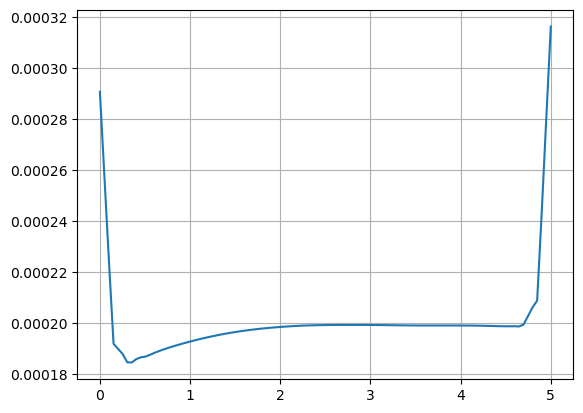

In [126]:
y = 2.519
x = np.linspace(0,5,100).tolist()
z = funcion(x,y)
plt.plot(x,z)
plt.grid()